<a href="https://colab.research.google.com/github/sujankhan187/Machine_learning_implementation/blob/main/cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install joblib

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import KFold,cross_val_score
my_kfold=KFold(n_splits=5)
import joblib

In [ ]:
cancer=load_breast_cancer()
print(cancer)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [ ]:
cancer=load_breast_cancer()
#print(cancer)
x=cancer.data[:,:2]
y=cancer.target
y_name=cancer.target_names
print(y_name[y])

['malignant' 'malignant' 'malignant' 'malignant' 'malignant' 'malignant'
 'malignant' 'malignant' 'malignant' 'malignant' 'malignant' 'malignant'
 'malignant' 'malignant' 'malignant' 'malignant' 'malignant' 'malignant'
 'malignant' 'benign' 'benign' 'benign' 'malignant' 'malignant'
 'malignant' 'malignant' 'malignant' 'malignant' 'malignant' 'malignant'
 'malignant' 'malignant' 'malignant' 'malignant' 'malignant' 'malignant'
 'malignant' 'benign' 'malignant' 'malignant' 'malignant' 'malignant'
 'malignant' 'malignant' 'malignant' 'malignant' 'benign' 'malignant'
 'benign' 'benign' 'benign' 'benign' 'benign' 'malignant' 'malignant'
 'benign' 'malignant' 'malignant' 'benign' 'benign' 'benign' 'benign'
 'malignant' 'benign' 'malignant' 'malignant' 'benign' 'benign' 'benign'
 'benign' 'malignant' 'benign' 'malignant' 'malignant' 'benign'
 'malignant' 'benign' 'malignant' 'malignant' 'benign' 'benign' 'benign'
 'malignant' 'malignant' 'benign' 'malignant' 'malignant' 'malignant'
 'benign' '

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=0)

In [ ]:
from sklearn.svm import SVC
svm_model=SVC(kernel="rbf",C=1,gamma=.5)
svm_model.fit(x_train,y_train)


SVC(C=1, gamma=0.5)

In [ ]:
inp=[[10,10]]
yp=svm_model.predict(inp)
print(yp)
print(y_name[yp])

[1]
['benign']


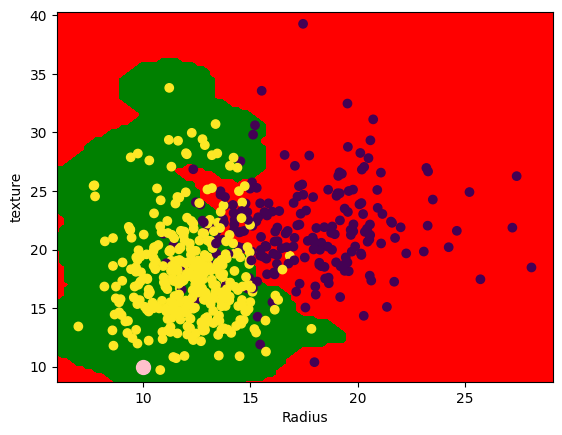

In [ ]:
import matplotlib.colors
mycolor=matplotlib.colors.ListedColormap(["red","green"])
from sklearn.inspection import DecisionBoundaryDisplay
DecisionBoundaryDisplay.from_estimator(
    svm_model,
    x,
    response_method="predict",
    xlabel="Radius",
    ylabel="texture",
    cmap=mycolor
)
plt.scatter(x[:,0],x[:,1],c=y)
plt.scatter(10,10,color="pink",s=100)

<Axes: >

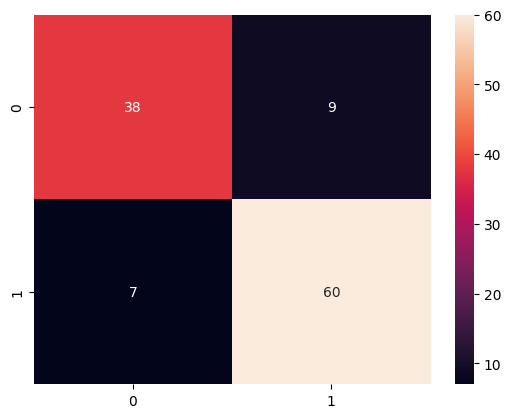

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,svm_model.predict(x_test))
sns.heatmap(cm,annot=True)

In [ ]:
ac=accuracy_score(y_test,svm_model.predict(x_test))
print(ac)

0.8596491228070176


In [ ]:
mySVMsc=cross_val_score(svm_model,x_test,y_test,cv=my_kfold)
print(mySVMsc)
print("Mean of kfold"+str(mySVMsc.mean()))

[0.69565217 0.86956522 0.91304348 0.91304348 0.86363636]
Mean of kfold0.8509881422924901


In [ ]:
joblib.dump(svm_model,"c3_cancer.joblib")

['c3_cancer.joblib']